**K-medias Imágenes**

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

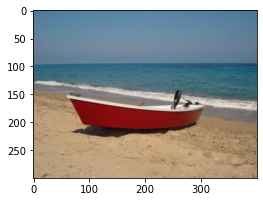

In [116]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)

#Paraetros y variables necesarias


In [117]:
#Paso 1: Definir el número de subgrupos
ue = {} #Unidades experimentales (Los pixeles)
k = 5   #Categorías para agrupar

#Paso 2: Definir centroides iniciales
centroides = []
for i in range(k):
    centroides.append([np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)])

#Extraer características de la imagen
Ir = np.reshape(I,(-1,3))   # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape
Ir = Ir.astype(float)

print(centroides)
#print(Ir)
#print(Ir[0:20])


[[84, 61, 111], [74, 169, 75], [213, 220, 31], [164, 52, 116], [121, 71, 160], [172, 193, 231], [85, 221, 43], [187, 29, 205], [175, 128, 159], [56, 250, 164]]


<BarContainer object of 10 artists>

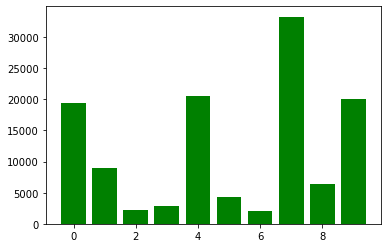

In [118]:
#Paso 3: Asignar las UE al centroide más cercano
def asignar():
    distancias = Ir.copy().tolist()  #tolist() para mejorar el rendimiento de lecturas en la memoria
    distancias = [
        [
                np.sqrt(abs(np.sum(Ir[i]-centroides[j])))
            for j in range(k)
        ]for i in range(Ir.shape[0])
    ]
    #List comprehension

    #print(distancias)
    #print(distancias[0:5])

    pertenencia = distancias.copy()
    #print(len(pertenencia))
    for i in range(len(pertenencia)):
        pertenencia[i] = distancias[i].index(min(distancias[i]))
    
    return pertenencia.copy(),distancias.copy()

pertenencia,distancias = asignar()
histPertenencia = {j:pertenencia.count(j) for j in range(k)} # https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
plt.bar(histPertenencia.keys(), histPertenencia.values(), color='g')

In [119]:
#Paso 4: Calcular los nuevos centroides
def calcularNuevosCentroides():
    #Promedio pionero
    promedios = centroides.copy()
    sum = [[0 for i in range(3)] for j in range(k)]      #Vector para la suma de los  promedios

    for i in range(Ir.shape[0]):
        #print(Ir[i][0])
        #Realizar las sumas de los tres pixeles
        sum[pertenencia[i]][0] = sum[pertenencia[i]][0] + Ir[i][0]
        sum[pertenencia[i]][1] = sum[pertenencia[i]][1] + Ir[i][1]
        sum[pertenencia[i]][2] = sum[pertenencia[i]][2] + Ir[i][2]
        
    for j in range(len(promedios)):
        pixelCount = pertenencia.count(j)
        #Promediar para los tres pixeles
        promedios[j][0] = sum[j][0] / pixelCount
        promedios[j][1] = sum[j][1] / pixelCount
        promedios[j][2] = sum[j][2] / pixelCount
    
    #print("PROMEDIOS\n",promedios)
    return promedios
    

centroides = calcularNuevosCentroides()


In [120]:
#Repetir la secuencia
maxPasos = 10
for paso in range(maxPasos):
    pertenencia,distancias = asignar()
    centroides = calcularNuevosCentroides()
    print(centroides) 

[[92.57239139261064, 33.557612667478686, 34.84271213966707], [62.80478488138319, 105.47500335075728, 120.16264575794129], [187.29858445297504, 157.90115163147792, 123.50275911708253], [95.47006767308693, 114.69625195210828, 119.13899010931806], [108.01758589295127, 126.95059657865734, 141.10642579903205], [215.32864090094702, 206.68901970821602, 197.97363706168414], [109.96298729741568, 118.2879982479194, 121.93867717915025], [118.82374100719424, 136.93535864377805, 149.94465417764798], [179.35616438356163, 150.20692834562698, 116.97813487881982], [195.11969434277276, 165.96648044692736, 132.0977974699801]]
[[101.02774287095215, 23.105074915418076, 21.493958434026098], [57.93853476821192, 102.06615618101546, 117.84975165562913], [187.8405959352394, 158.30675163623837, 123.88830520151568], [89.61029176017955, 113.69830073741583, 120.09971144597627], [108.13469696969698, 127.80439393939393, 142.6020707070707], [216.25172964342735, 207.57876530069186, 198.80521554018094], [109.23867158671

<BarContainer object of 5 artists>

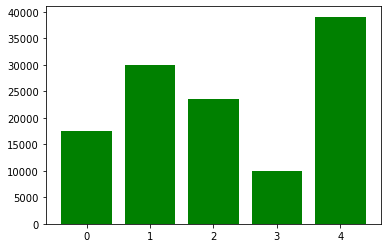

In [ ]:
#Histograma para verificar el progreso
histPertenencia = {j:pertenencia.count(j) for j in range(k)} # https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
plt.bar(histPertenencia.keys(), histPertenencia.values(), color='g')

Text(0.5, 1.0, 'Imagen en 5 clusters')

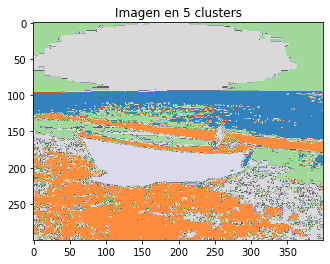

In [ ]:
#Visualizar la imagen en clusters
mascaraDePertenencia = np.reshape(pertenencia,(I.shape[0],I.shape[1]))
#print(mascaraDePertenencia)
#https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html#sequential
plt.imshow(mascaraDePertenencia, cmap='tab20c',vmin=0,vmax=4)
plt.title("Imagen en "+str(k)+" clusters")
